# <font color=#c6b1fe>Enjoei</font><font color=#450041> Business Analytics Case</font>

## Table of Contents

[1. Information](#1.-Information)

[2. Libraries](#2.-Libraries)

[3. Data](#3.-Data)
    
[4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)

* [4.1 Funnel](#4.1-Funnel)
* [4.2 Orders](#4.2-Orders)
* [4.3 Comparison](#4.3-Comparison)

[5. Time series](#5.-Time-series)

* [5.1 Funnel](#5.1-Funnel)
* [5.2 Orders](#5.2-Orders)

## 1. Information
[Return to Table of Contents](#Table-of-Contents)

**Case:**

Imagine that you are part of enjoei's Analytics team and are responsible for providing insights and guide the decisions of your squad.

This quarter the goal is to reverse the sales trend, which has fallen over the last quarter.

**Questions:**

* What are the apparent causes of the drop in sales?
Try to understand the main bottlenecks in the sales funnel and hypothesize what might have caused each behavior.

Is there any other information that would be useful for your analysis?
Why? What answers would we have with this additional information?

Can you think of other analyses that would help achieve the objective of this quarter?

Describe the analyses and their benefits and impact on the squad's decisions.

Translated with DeepL.com (free version)

## 2. Libraries
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import datetime
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot


## 3. Data
[Return to Table of Contents](#Table-of-Contents)

In [2]:
funnel = pd.read_csv("/home/pathilink/Documentos/test/enjoei/enjoei_business_analytics_case/data/funnel.csv")

funnel.sample(5)

,date,visits,product_views,carts_created,orders,orders_value
75,20/04/2020,21240,26093,2729,972,"124603,67"
66,05/05/2020,21650,26275,2640,933,"121838,6"
52,17/06/2020,23334,25730,2802,895,"114662,88"
35,18/04/2020,17335,23112,2408,864,"116145,66"
7,09/06/2020,22285,24649,2483,794,"100126,52"


In [3]:
orders = pd.read_csv("/home/pathilink/Documentos/test/enjoei/enjoei_business_analytics_case/data/orders.csv")

orders.sample(5)

,order_id,sold_at,seller_id,buyer_id,product_id,shipped_at,order_status,order_value
57249,461749,2020-04-27,231848,614173,885160,2020-04-30,completed,54.94
57328,462308,2020-04-28,486206,533941,665536,2020-04-30,completed,65.38
61029,469428,2020-05-03,158625,236525,791506,2020-05-03,completed,75.50
81257,493351,2020-05-25,727705,19979,534460,2020-05-26,completed,147.61
65528,473810,2020-05-07,982506,377893,785613,2020-05-08,completed,102.37


## 4. Exploratory Data Analysis
[Return to Table of Contents](#Table-of-Contents)

## 4.1 Funnel
[Return to Table of Contents](#Table-of-Contents)

In [4]:
print('The data has {} rows and {} columns.'.format(funnel.shape[0], funnel.shape[1]))

The data has 91 rows and 6 columns.


In [5]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           91 non-null     object
 1   visits         91 non-null     int64 
 2   product_views  91 non-null     int64 
 3   carts_created  91 non-null     int64 
 4   orders         91 non-null     int64 
 5   orders_value   91 non-null     object
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


In [6]:
# transform object into datetime - format 'yyyy-mm-dd'
funnel['date'] = pd.to_datetime(funnel['date'], format='%d/%m/%Y')

# transform object into float
funnel['orders_value'] = pd.to_numeric(funnel['orders_value'].str.replace(',', '.'), errors='coerce').astype(float)

funnel.head()

,date,visits,product_views,carts_created,orders,orders_value
0,2020-04-09,21885,27904,2812,1025,131804.08
1,2020-04-10,20478,26600,2792,1025,135637.38
2,2020-04-01,21650,27702,2778,1032,135037.59
3,2020-04-13,21135,27109,2861,1037,134157.10
4,2020-04-08,21859,28580,2876,1045,133892.66


In [7]:
funnel.describe()

,visits,product_views,carts_created,orders,orders_value
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,20844.648352,24824.054945,2607.032967,891.142857,115354.944615
std,2003.111199,2907.604292,318.403917,135.000294,17556.069907
min,17100.000000,18737.000000,1968.000000,627.000000,82275.680000
25%,18487.000000,22678.500000,2421.000000,803.500000,104429.625000
50%,21650.000000,25124.000000,2634.000000,882.000000,114673.360000
75%,22332.000000,26948.000000,2801.000000,993.000000,128624.980000
max,23544.000000,30577.000000,3310.000000,1198.000000,153729.770000


In [8]:
# 3 months of data

print("Minimum date:", funnel.date.min())
print("Maximum date:", funnel.date.max())

Minimum date: 2020-04-01 00:00:00
Maximum date: 2020-06-30 00:00:00


## 4.2 Orders
[Return to Table of Contents](#Table-of-Contents)

In [9]:
print('The data has {} rows and {} columns.'.format(orders.shape[0], orders.shape[1]))

The data has 100125 rows and 8 columns.


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100125 entries, 0 to 100124
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      100125 non-null  int64  
 1   sold_at       100125 non-null  object 
 2   seller_id     100125 non-null  int64  
 3   buyer_id      100125 non-null  int64  
 4   product_id    100125 non-null  int64  
 5   shipped_at    81094 non-null   object 
 6   order_status  100125 non-null  object 
 7   order_value   100125 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.1+ MB


In [11]:
# only two status
orders['order_status'].unique()

array(['canceled', 'completed'], dtype=object)

In [12]:
# transform object into datetime - format 'yyyy-mm-dd'
# NaT: "Not a Time" 
orders['sold_at'] = pd.to_datetime(orders['sold_at'], format='%Y-%m-%d')
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'], format='%Y-%m-%d', errors='coerce')

In [13]:
# all NaT's are canceled orders
orders.query('shipped_at == "NaT" & order_status != "canceled"')

,order_id,sold_at,seller_id,buyer_id,product_id,shipped_at,order_status,order_value


In [14]:
# 3 months of data

print("Minimum sold_at:", orders.sold_at.min())
print("Maximum sold_at:", orders.sold_at.max())
print("")
print("Minimum shipped_at:", orders.shipped_at.min())
print("Maximum shipped_at:", orders.shipped_at.max())

Minimum sold_at: 2020-04-01 00:00:00
Maximum sold_at: 2020-06-30 00:00:00

Minimum shipped_at: 2020-04-01 00:00:00
Maximum shipped_at: 2020-07-05 00:00:00


In [15]:
product_per_order = orders.groupby('order_id')['product_id'].count()

if (product_per_order > 1).any():
    print("There are orders with more than one product.")
else:
    print("All orders have only one product.")

All orders have only one product.


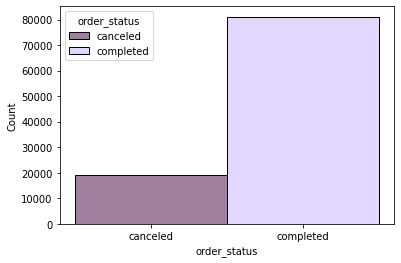

In [16]:
# status distribution: ~20% are canceled

colors = {'canceled': '#450041', 'completed': '#c6b1fe'}

sns.histplot(orders, x = 'order_status', hue='order_status', palette=colors);

In [17]:
# sellers with the highest cancellation totals
top_canceled_sellers = (orders 
                        .query("order_status == 'canceled'") 
                        .groupby('seller_id')['order_id'].count() 
                        .sort_values(ascending=False) 
                        .head(10) 
                        .index.tolist()
                       )

top_canceled_sellers

[312158, 879060, 338102, 244474, 448807, 389419, 106866, 59384, 982506, 881426]

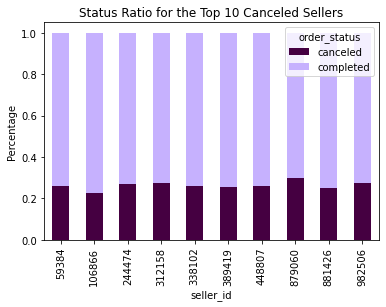

In [18]:
# only the most canceled sellers
filtered_orders = orders.query('seller_id in @top_canceled_sellers')

# calculate the proportion of each order status for each seller
grouped = filtered_orders.groupby(['seller_id', 'order_status']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0)

# define colors
colors = {'canceled': '#450041', 'completed': '#c6b1fe'}

# plot
percentages.plot(kind='bar', stacked=True, color=colors)

# define the axis title and labels
plt.title('Status Ratio for the Top 10 Canceled Sellers')
plt.xlabel('seller_id')
plt.ylabel('Percentage')

# display
plt.show()

# all have a higher than average percentage of cancellations

In [19]:
# what would be the cancellation date?
# what are the reasons for canceling?

In [20]:
df_orders = orders.copy()

In [21]:
# delivery time
df_orders['delivery_duration'] = (df_orders['shipped_at'] - df_orders['sold_at']).dt.days

# up to 2 days for delivery
df_orders['delivery_duration'].mean().round()

2.0

In [22]:
df_orders.sample(5)

,order_id,sold_at,seller_id,buyer_id,product_id,shipped_at,order_status,order_value,delivery_duration
54778,460170,2020-04-26,78173,611353,281001,2020-04-27,completed,246.54,1.0
35062,437056,2020-04-07,544417,180724,336440,2020-04-07,completed,175.71,0.0
36013,437853,2020-04-08,497336,857674,347570,2020-04-08,completed,88.43,0.0
50090,456143,2020-04-22,521293,962336,552368,2020-04-22,completed,143.35,0.0
49257,451933,2020-04-19,637868,475904,310750,2020-04-22,completed,49.50,3.0


## 4.3 Comparison
[Return to Table of Contents](#Table-of-Contents)

In [23]:
start_date = '2020-04-01'
end_date = '2020-04-10'

In [24]:
funnel[['date', 'orders']].query('@start_date <= date <= @end_date').sort_values('date')

,date,orders
2,2020-04-01,1032
38,2020-04-02,1127
42,2020-04-03,1135
8,2020-04-04,795
54,2020-04-05,896
87,2020-04-06,1010
88,2020-04-07,1011
4,2020-04-08,1045
0,2020-04-09,1025
1,2020-04-10,1025


In [25]:
# the funnel only include non-canceled orders

(orders
    .query('order_status == "completed"')
    .groupby('sold_at')[['order_id']]
    .count()
    .reset_index()
    
 ).query('@start_date <= sold_at <= @end_date')

,sold_at,order_id
0,2020-04-01,1032
1,2020-04-02,1127
2,2020-04-03,1135
3,2020-04-04,795
4,2020-04-05,896
5,2020-04-06,1010
6,2020-04-07,1011
7,2020-04-08,1045
8,2020-04-09,1025
9,2020-04-10,1025


## 5. Time series
[Return to Table of Contents](#Table-of-Contents)

In [26]:
def plot_trend(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))
  sns.set_palette('Accent')
  sns.set_style('darkgrid')

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=12, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=12, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=12, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)

## 5.1 Funnel
[Return to Table of Contents](#Table-of-Contents)

In [27]:
# order date column
df_funnel = funnel.sort_values('date').copy()

# add weekday
df_funnel['day_of_week'] = df_funnel['date'].dt.strftime('%a')

# add month
df_funnel['month'] = df_funnel['date'].dt.month

df_funnel.head()

,date,visits,product_views,carts_created,orders,orders_value,day_of_week,month
2,2020-04-01,21650,27702,2778,1032,135037.59,Wed,4
38,2020-04-02,21686,27883,3049,1127,149464.26,Thu,4
42,2020-04-03,20300,28215,3082,1135,145831.22,Fri,4
8,2020-04-04,17100,21092,2159,795,99305.19,Sat,4
54,2020-04-05,17234,22406,2438,896,115865.05,Sun,4


## Trends

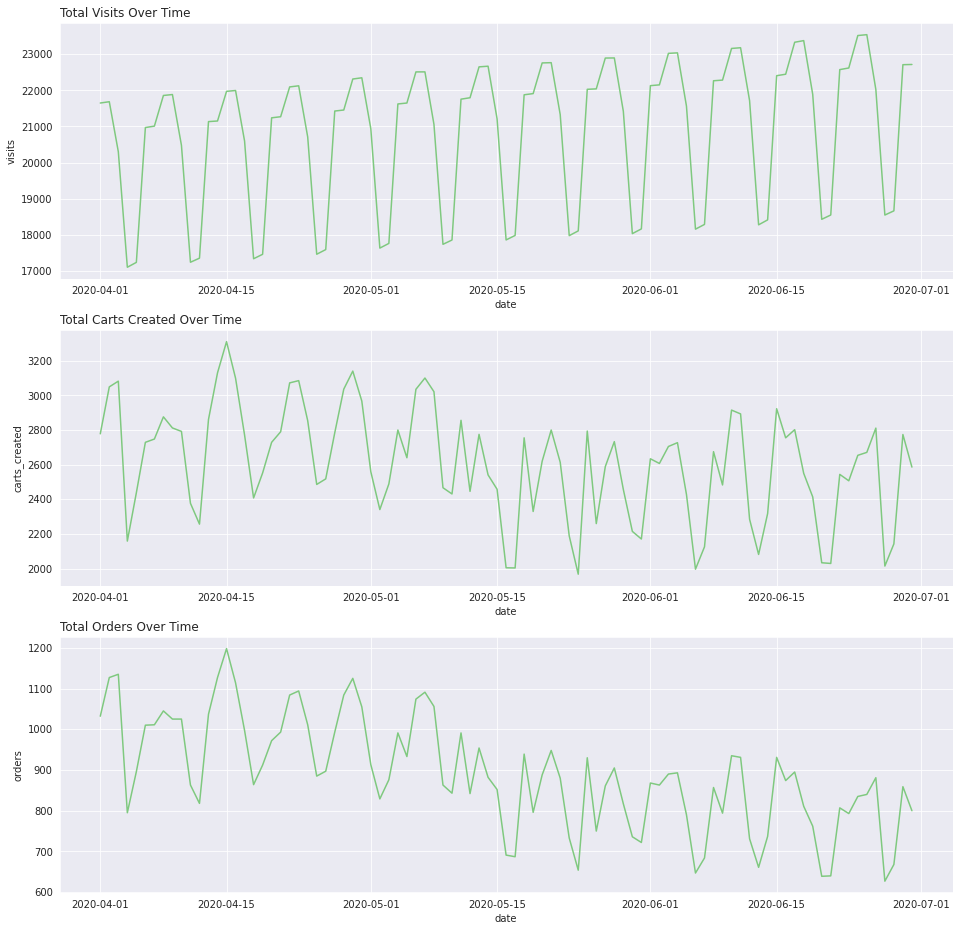

In [28]:
plot_trend(
    'date', 
    'visits', 
    'carts_created', 
    'orders', 
    df_funnel, 
    'Total Visits Over Time', 
    'Total Carts Created Over Time', 
    'Total Orders Over Time'
)

## Decomposing

In [29]:
# calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row).

df_funnel['increase_orders'] = df_funnel['orders'].diff()
df_funnel['acceleration_orders'] = df_funnel['increase_orders'].diff()

df_funnel.head()

,date,visits,product_views,carts_created,orders,orders_value,day_of_week,month,increase_orders,acceleration_orders
2,2020-04-01,21650,27702,2778,1032,135037.59,Wed,4,NaN,NaN
38,2020-04-02,21686,27883,3049,1127,149464.26,Thu,4,95.0,NaN
42,2020-04-03,20300,28215,3082,1135,145831.22,Fri,4,8.0,-87.0
8,2020-04-04,17100,21092,2159,795,99305.19,Sat,4,-340.0,-348.0
54,2020-04-05,17234,22406,2438,896,115865.05,Sun,4,101.0,441.0


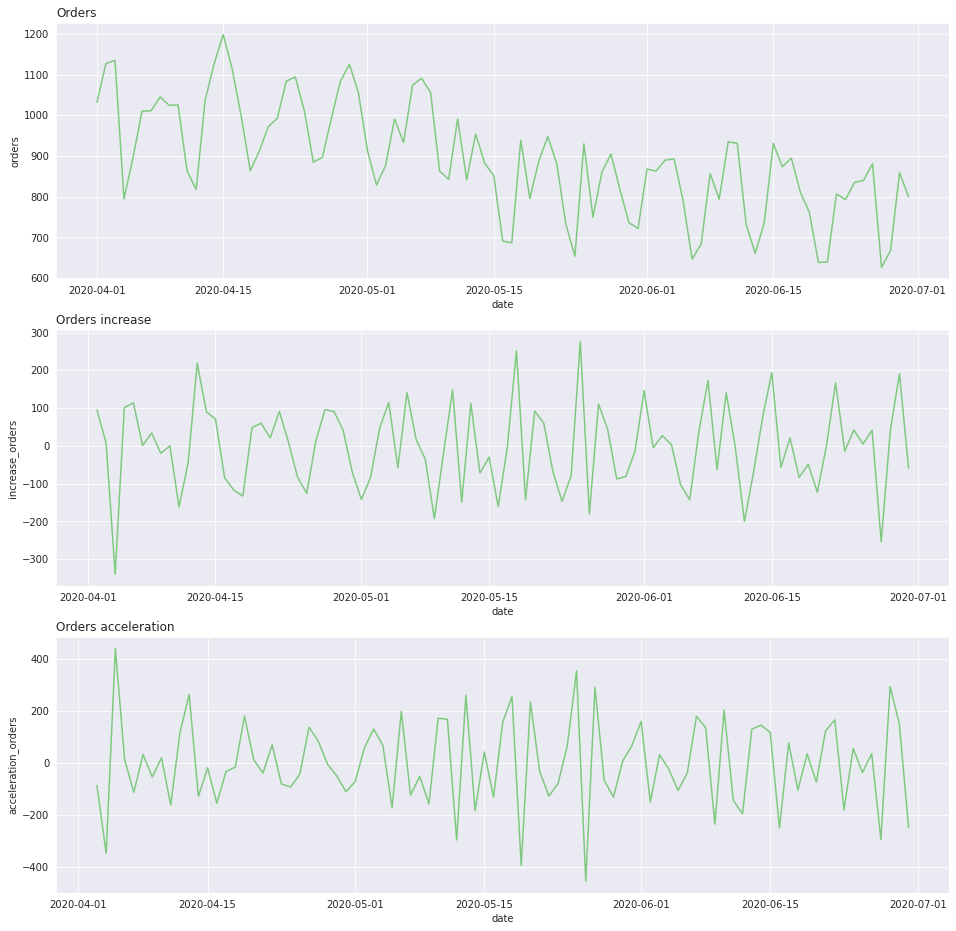

In [30]:
# orders column
plot_trend(
    'date', 
    'orders', 
    'increase_orders', 
    'acceleration_orders', 
    df_funnel, 
    'Orders', 
    'Orders increase', 
    'Orders acceleration'
)

## Seasonality

In [31]:
# grouping
grouped_funnel = (df_funnel
                  .groupby('day_of_week')[['orders', 'increase_orders', 'acceleration_orders']]
                  .mean()
                  .round()
                  .reset_index()
                  .sort_values('day_of_week')
                 )
# mapping dictionary for the days of the week
day_order = {'Fri': 4, 'Sat': 5, 'Sun': 6, 'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3}

# new column with the days in order 
grouped_funnel['day_of_week_order'] = grouped_funnel['day_of_week'].map(day_order)

# sort by the new column
grouped_funnel = grouped_funnel.sort_values('day_of_week_order').drop('day_of_week_order', axis=1)

grouped_funnel

,day_of_week,orders,increase_orders,acceleration_orders
1,Mon,937.0,165.0,150.0
5,Tue,897.0,-40.0,-206.0
6,Wed,986.0,77.0,116.0
4,Thu,978.0,-8.0,-93.0
0,Fri,912.0,-67.0,-59.0
2,Sat,756.0,-155.0,-89.0
3,Sun,772.0,15.0,171.0


In [32]:
# grouping
grouped_funnel_month = (df_funnel
                  .groupby('month')[['orders', 'increase_orders', 'acceleration_orders']]
                  .mean()
                  .round()
                  .reset_index()
                  .sort_values('month')
                 )

grouped_funnel_month

,month,orders,increase_orders,acceleration_orders
0,4,1007.0,1.0,-6.0
1,5,869.0,-11.0,2.0
2,6,798.0,3.0,-2.0


In [33]:
# operation changes?
# business rules?

## 5.2 Orders
[Return to Table of Contents](#Table-of-Contents)

In [34]:
# grouping
grouped_orders = (df_orders
                  .groupby(['sold_at', 'order_status'])['order_id']
                  .count()
                  .round()
                  .reset_index()
                  .sort_values('sold_at')
                  .rename(columns={'order_id': 'orders'})
                 )
grouped_orders.head()

,sold_at,order_status,orders
0,2020-04-01,canceled,242
1,2020-04-01,completed,1032
2,2020-04-02,canceled,278
3,2020-04-02,completed,1127
4,2020-04-03,canceled,267


## Decomposing

In [35]:
# filter only canceled orders
grouped_orders_canceled = grouped_orders.query('order_status == "canceled"').copy()

In [36]:
grouped_orders_canceled['increase_orders'] = grouped_orders_canceled['orders'].diff()
grouped_orders_canceled['acceleration_orders'] = grouped_orders_canceled['increase_orders'].diff()

grouped_orders_canceled.head()

,sold_at,order_status,orders,increase_orders,acceleration_orders
0,2020-04-01,canceled,242,NaN,NaN
2,2020-04-02,canceled,278,36.0,NaN
4,2020-04-03,canceled,267,-11.0,-47.0
6,2020-04-04,canceled,195,-72.0,-61.0
8,2020-04-05,canceled,202,7.0,79.0


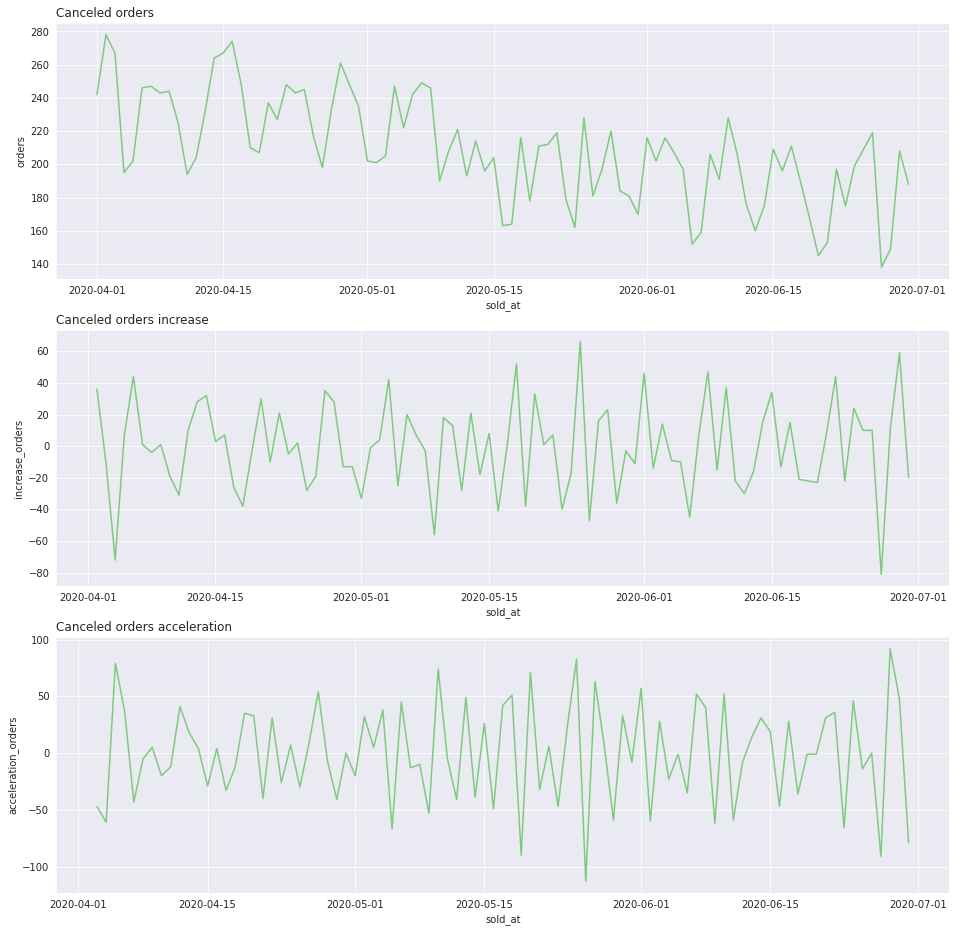

In [37]:
# orders column
plot_trend(
    'sold_at', 
    'orders', 
    'increase_orders', 
    'acceleration_orders', 
    grouped_orders_canceled, 
    'Canceled orders', 
    'Canceled orders increase', 
    'Canceled orders acceleration'
)

## Seasonality

In [38]:
# add weekday
grouped_orders_canceled['day_of_week'] = grouped_orders_canceled['sold_at'].dt.strftime('%a')

# add month
grouped_orders_canceled['month'] = grouped_orders_canceled['sold_at'].dt.month

grouped_orders_canceled.sample(3)

,sold_at,order_status,orders,increase_orders,acceleration_orders,day_of_week,month
6,2020-04-04,canceled,195,-72.0,-61.0,Sat,4
134,2020-06-07,canceled,159,7.0,52.0,Sun,6
136,2020-06-08,canceled,206,47.0,40.0,Mon,6


In [39]:
# grouping
grouped_orders_canceled_weekday = (grouped_orders_canceled
                  .groupby('day_of_week')[['orders', 'increase_orders', 'acceleration_orders']]
                  .mean()
                  .round()
                  .reset_index()
                  .sort_values('day_of_week')
                 )
# mapping dictionary for the days of the week
day_order = {'Fri': 4, 'Sat': 5, 'Sun': 6, 'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3}

# new column with the days in order 
grouped_orders_canceled_weekday['day_of_week_order'] = grouped_orders_canceled_weekday['day_of_week'].map(day_order)

# sort by the new column
grouped_orders_canceled_weekday = grouped_orders_canceled_weekday.sort_values('day_of_week_order').drop('day_of_week_order', axis=1)

grouped_orders_canceled_weekday

,day_of_week,orders,increase_orders,acceleration_orders
1,Mon,223.0,42.0,39.0
5,Tue,210.0,-13.0,-55.0
6,Wed,228.0,16.0,28.0
4,Thu,228.0,-0.0,-19.0
0,Fri,215.0,-13.0,-12.0
2,Sat,179.0,-37.0,-24.0
3,Sun,181.0,2.0,39.0


In [40]:
# grouping
grouped_orders_canceled_month = (grouped_orders_canceled
                  .groupby('month')[['orders', 'increase_orders', 'acceleration_orders']]
                  .mean()
                  .round()
                  .reset_index()
                  .sort_values('month')
                 )

grouped_orders_canceled_month

,month,orders,increase_orders,acceleration_orders
0,4,236.0,-0.0,-2.0
1,5,203.0,-2.0,0.0
2,6,188.0,1.0,-0.0
